In [48]:
library(data.table)
library(dplyr)
library(ggplot2)
library(qvalue)

In [49]:
saige_dir = '/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/eqtl_results/saige_qtl/december24_freeze/'
celltypes = list.files(saige_dir)
celltypes = celltypes[!(celltypes %in% c('README.md','CD4_TCM_sample_perm0'))]
length(celltypes)
celltypes

[1] 28

[1] "ASDC"              "B_intermediate"    "B_memory"         
 [4] "B_naive"           "CD14_Mono"         "CD16_Mono"        
 [7] "CD4_CTL"           "CD4_Naive"         "CD4_Proliferating"
[10] "CD4_TCM"           "CD4_TEM"           "CD8_Naive"        
[13] "CD8_Proliferating" "CD8_TCM"           "CD8_TEM"          
[16] "cDC1"              "cDC2"              "dnT"              
[19] "gdT"               "HSPC"              "ILC"              
[22] "MAIT"              "NK"                "NK_CD56bright"    
[25] "NK_Proliferating"  "pDC"               "Plasmablast"      
[28] "Treg"

In [50]:
cols_df = as.data.frame(fread('/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/plotting_notebooks/overview_figures/manuscript_figures/colour_palette_table.tsv'))
cols_df

wg2_scpred_prediction,color_material,color_biorender1,color_biorender2,color,cell_type,major_cell_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD4_TCM,#0C46A0FF,#AB728A,#9C85C3,#311A92FF,CD4 TCM,CD4 T
CD4_Naive,#1976D2FF,#83576A,#605278,#512CA7FF,CD4 Naive,CD4 T
CD4_TEM,#2096F2FF,#C4839E,#8773A8,#6639B7FF,CD4 TEM,CD4 T
CD4_CTL,#64B4F6FF,#DA91B0,#B197DD,#9474CCFF,CD4 CTL,CD4 T
Treg,#90CAF8FF,#F4BFE0,#DFB4EC,#B29DDAFF,Treg,CD4 T
CD4_Proliferating,#BADEFAFF,#DA91B0,#D4ACE1,#D1C4E9FF,CD4 Proliferating,CD4 T
gdT,#817717FF,#A7B4D3,#DE94B4,#870D4EFF,gdT,Unconventional T
MAIT,#AEB32BFF,#5D6E8D,#B0758E,#C1185AFF,MAIT,Unconventional T
dnT,#CCDC39FF,#6A81B5,#EE9FC1,#E91E63FF,dnT,Unconventional T


In [51]:
df_list = list()
for (celltype in celltypes){
    common_acat_file = paste0(saige_dir,celltype,'/',celltype,'_all_cis_cv_gene_level_results.tsv')
    common_acat_df = as.data.frame(fread(common_acat_file))
    common_acat_df$qvalue = qvalue(common_acat_df$ACAT_p)$qvalues
    common_acat_df$celltype = celltype
    df_list[[celltype]] = common_acat_df
}
df_combine = rbindlist(df_list)
head(df_combine)

gene,ACAT_p,top_MarkerID,top_pval,qvalue,celltype
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
ENSG00000000457,0.2842556,1:169927679:G:GT,0.001991190,0.8115791,ASDC
ENSG00000000460,0.9486428,1:169788459:T:C,0.003823260,0.9977207,ASDC
ENSG00000000938,0.6203965,1:27697371:C:A,0.003466500,0.9977207,ASDC
ENSG00000001460,0.8674904,1:24322926:C:T,0.000183998,0.9977207,ASDC
ENSG00000001461,0.9658630,1:24374254:TTTG:T,0.006238500,0.9977207,ASDC
ENSG00000004455,0.9117075,1:32976533:A:ACACAC,0.004864050,0.9977207,ASDC


In [52]:
df_combine = as.data.frame(df_combine)

In [53]:
celltype_to_numbers_mapping = data.frame(celltype = c('CD4_TCM','CD4_Naive','CD4_TEM','CD4_CTL','Treg','CD4_Proliferating',
                                       'CD8_TEM','CD8_Naive','CD8_TCM','CD8_Proliferating',
                                       'NK','NK_CD56bright','NK_Proliferating',
                                       'B_naive','B_intermediate','B_memory','Plasmablast',
                                       'CD14_Mono','CD16_Mono',
                                       'gdT','MAIT','dnT','ILC',
                                       'cDC2','pDC','cDC1','ASDC',
                                       'HSPC'),
                                        celltype_number = c(paste0('0',1:9),10:28))
celltype_to_numbers_mapping

celltype,celltype_number
<chr>,<chr>
CD4_TCM,01
CD4_Naive,02
CD4_TEM,03
CD4_CTL,04
Treg,05
CD4_Proliferating,06
CD8_TEM,07
CD8_Naive,08
CD8_TCM,09


In [54]:
df_new = inner_join(df_combine, celltype_to_numbers_mapping, by='celltype')
head(df_new,2)

,gene,ACAT_p,top_MarkerID,top_pval,qvalue,celltype,celltype_number
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000000457,0.2842556,1:169927679:G:GT,0.00199119,0.8115791,ASDC,27
2,ENSG00000000460,0.9486428,1:169788459:T:C,0.00382326,0.9977207,ASDC,27


In [55]:
df_new$celltype_gene = paste0(df_new$celltype_number,'_',df_new$gene)
# df_new$celltype_gene = paste0(df_new$celltype,'_',df_new$gene)

In [56]:
tail(df_new)

,gene,ACAT_p,top_MarkerID,top_pval,qvalue,celltype,celltype_number,celltype_gene
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
401994,ENSG00000290923,1.943223e-04,9:41109090:A:C,1.83732e-07,5.161372e-04,Treg,05,05_ENSG00000290923
401995,ENSG00000290924,7.693076e-01,9:85869365:CTGTGTG:C,3.28226e-03,6.480756e-01,Treg,05,05_ENSG00000290924
401996,ENSG00000291011,1.857156e-25,9:62440572:T:A,9.77454e-28,2.249575e-24,Treg,05,05_ENSG00000291011
401997,ENSG00000291075,5.848211e-10,9:40916825:GA:G,1.16106e-12,2.967076e-09,Treg,05,05_ENSG00000291075
401998,ENSG00000291168,1.797087e-23,9:92829279:A:G,5.04250e-26,2.021702e-22,Treg,05,05_ENSG00000291168
401999,ENSG00000291181,1.603042e-77,9:40099730:T:C,1.79891e-80,8.941427e-76,Treg,05,05_ENSG00000291181


In [57]:
cols_df$celltype = cols_df$wg2_scpred_prediction
cols_df = inner_join(cols_df,celltype_to_numbers_mapping)

Joining with `by = join_by(celltype)`


In [58]:
cols_df = cols_df[order(cols_df$celltype_number),]

In [59]:
cols=cols_df$color
cols

[1] "#311A92FF" "#512CA7FF" "#6639B7FF" "#9474CCFF" "#B29DDAFF" "#D1C4E9FF"
 [7] "#0C46A0FF" "#1E87E5FF" "#41A5F4FF" "#BADEFAFF" "#2D7D32FF" "#4CAE50FF"
[13] "#A5D6A6FF" "#F47F17FF" "#FABF2CFF" "#FFEB3AFF" "#FFF176FF" "#D84314FF"
[19] "#FFAB91FF" "#870D4EFF" "#C1185AFF" "#E91E63FF" "#F06192FF" "#5D3F37FF"
[25] "#795447FF" "#A0877FFF" "#D7CCC7FF" "#BDBDBDFF"

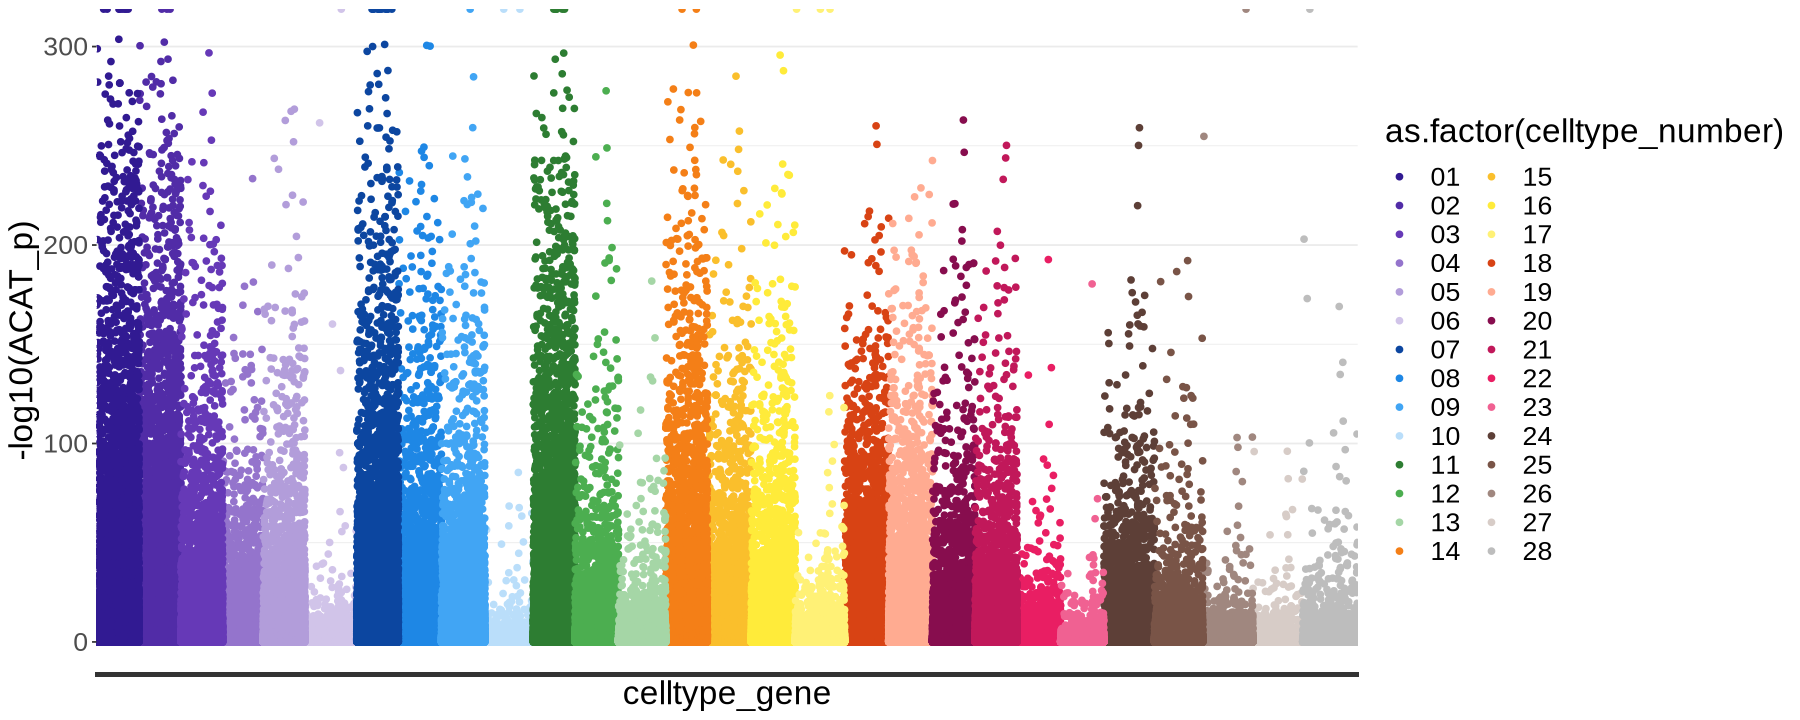

In [60]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(ACAT_p),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p

In [61]:
# rare variants

In [62]:
df_list = list()
for (celltype in celltypes){
#     if (celltype %in% c('dnT','gdT','pDC')){next}
    rare_set_file = paste0(saige_dir,celltype,'/',celltype,'_all_cis_rv_set_test_results.tsv')
    rare_set_df = as.data.frame(fread(rare_set_file))
    df = rare_set_df[rare_set_df$Group == "Cauchy",]
    df <- df[rowSums(is.na(df)) != ncol(df), ]
    df$qvalue = qvalue(df$Pvalue)$qvalues
    df$celltype = celltype
    df_list[[celltype]] = df
}
df_combine = rbindlist(df_list)
head(df_combine)

Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare,qvalue,celltype
<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
ENSG00000000457,Cauchy,NA,NA,NA,7.686930e-01,3.037512e-01,NA,0.9191680,0.5721354,NA,NA,NA,NA,NA,6.909129e-01,ASDC
ENSG00000000460,Cauchy,NA,NA,NA,1.086815e-01,3.518001e-02,NA,0.8486423,0.2003384,NA,NA,NA,NA,NA,2.108089e-01,ASDC
ENSG00000000938,Cauchy,NA,NA,NA,1.451239e-02,4.815673e-03,NA,0.4537069,0.6436826,NA,NA,NA,NA,NA,4.572631e-02,ASDC
ENSG00000001460,Cauchy,NA,NA,NA,1.280975e-06,4.269914e-07,NA,0.5002314,0.6872513,NA,NA,NA,NA,NA,1.155112e-05,ASDC
ENSG00000001461,Cauchy,NA,NA,NA,8.116344e-01,6.918542e-01,NA,0.7700342,0.8847768,NA,NA,NA,NA,NA,7.038505e-01,ASDC
ENSG00000004455,Cauchy,NA,NA,NA,8.711246e-01,7.583009e-01,NA,0.8242684,0.9276461,NA,NA,NA,NA,NA,7.192949e-01,ASDC


In [63]:
df_new = inner_join(df_combine, celltype_to_numbers_mapping, by='celltype')
df_new$celltype_gene = paste0(df_new$celltype_number,'_',df_new$Region)

In [64]:
head(df_new)

Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare,qvalue,celltype,celltype_number,celltype_gene
<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
ENSG00000000457,Cauchy,NA,NA,NA,7.686930e-01,3.037512e-01,NA,0.9191680,0.5721354,NA,NA,NA,NA,NA,6.909129e-01,ASDC,27,27_ENSG00000000457
ENSG00000000460,Cauchy,NA,NA,NA,1.086815e-01,3.518001e-02,NA,0.8486423,0.2003384,NA,NA,NA,NA,NA,2.108089e-01,ASDC,27,27_ENSG00000000460
ENSG00000000938,Cauchy,NA,NA,NA,1.451239e-02,4.815673e-03,NA,0.4537069,0.6436826,NA,NA,NA,NA,NA,4.572631e-02,ASDC,27,27_ENSG00000000938
ENSG00000001460,Cauchy,NA,NA,NA,1.280975e-06,4.269914e-07,NA,0.5002314,0.6872513,NA,NA,NA,NA,NA,1.155112e-05,ASDC,27,27_ENSG00000001460
ENSG00000001461,Cauchy,NA,NA,NA,8.116344e-01,6.918542e-01,NA,0.7700342,0.8847768,NA,NA,NA,NA,NA,7.038505e-01,ASDC,27,27_ENSG00000001461
ENSG00000004455,Cauchy,NA,NA,NA,8.711246e-01,7.583009e-01,NA,0.8242684,0.9276461,NA,NA,NA,NA,NA,7.192949e-01,ASDC,27,27_ENSG00000004455


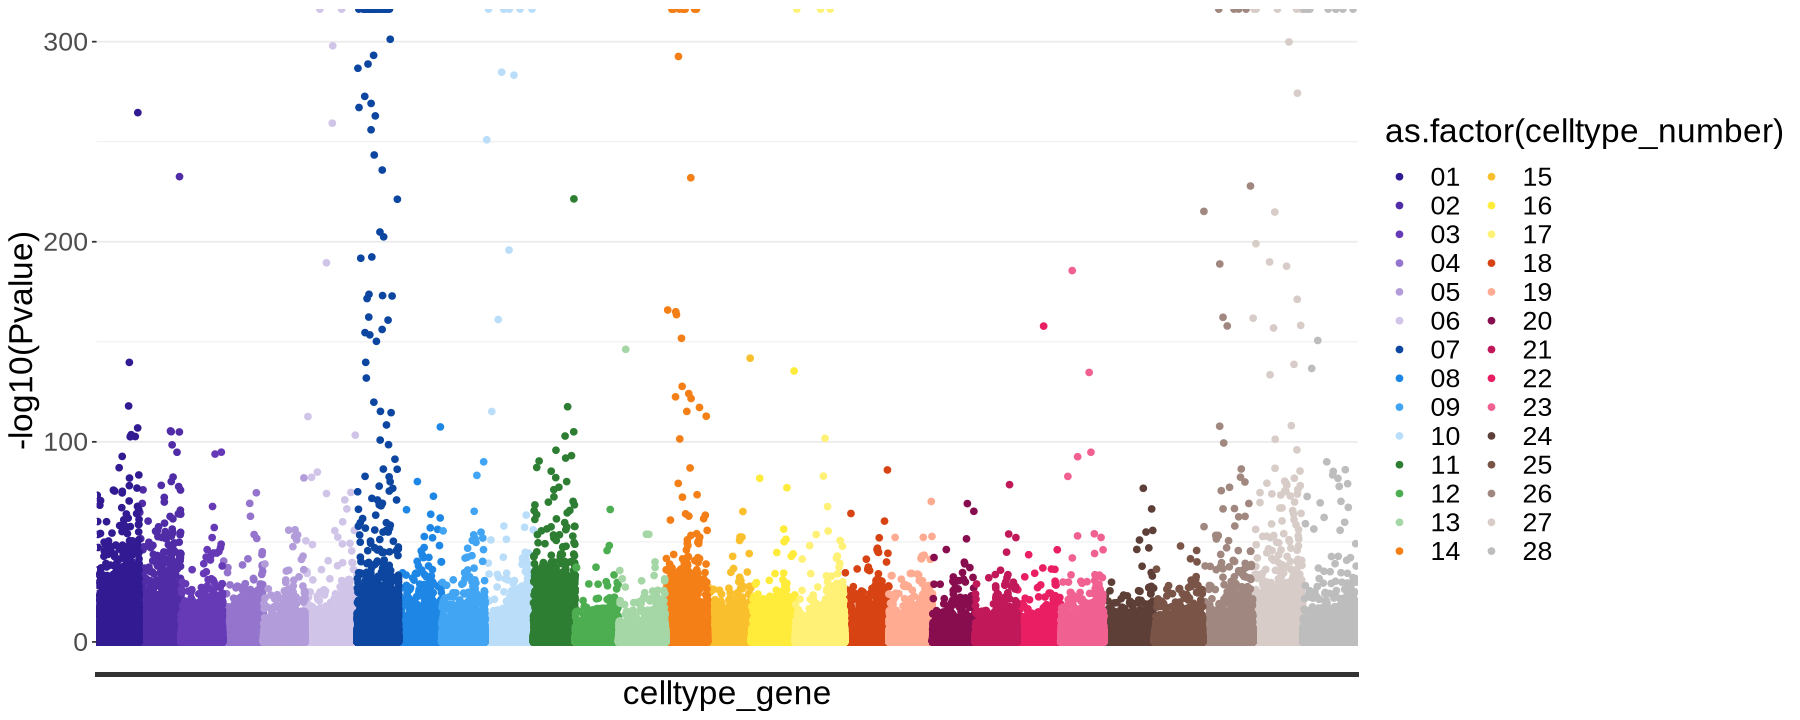

In [65]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(Pvalue),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p

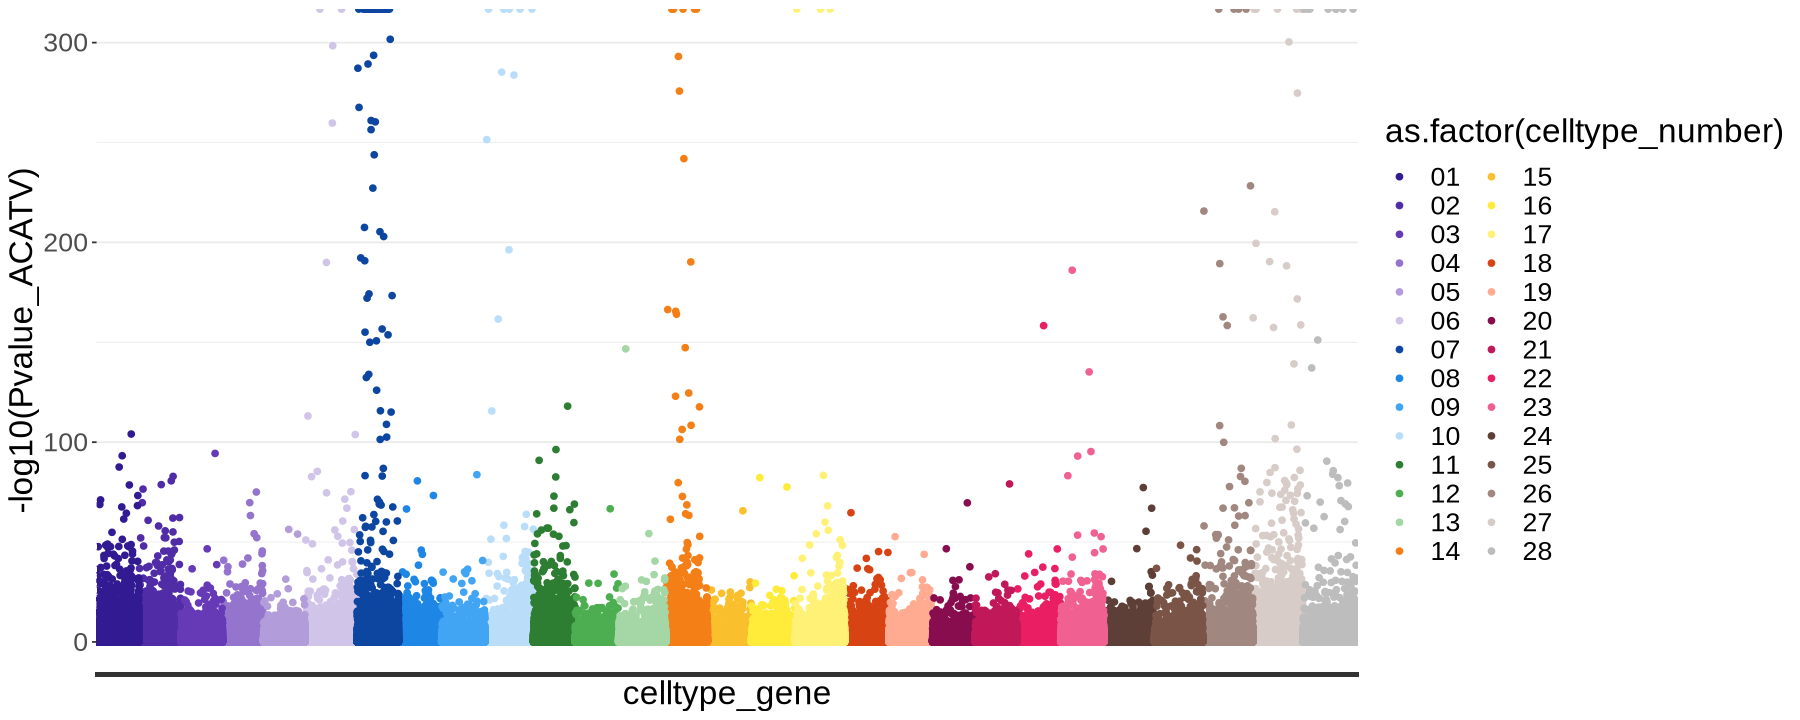

In [66]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(Pvalue_ACATV),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p

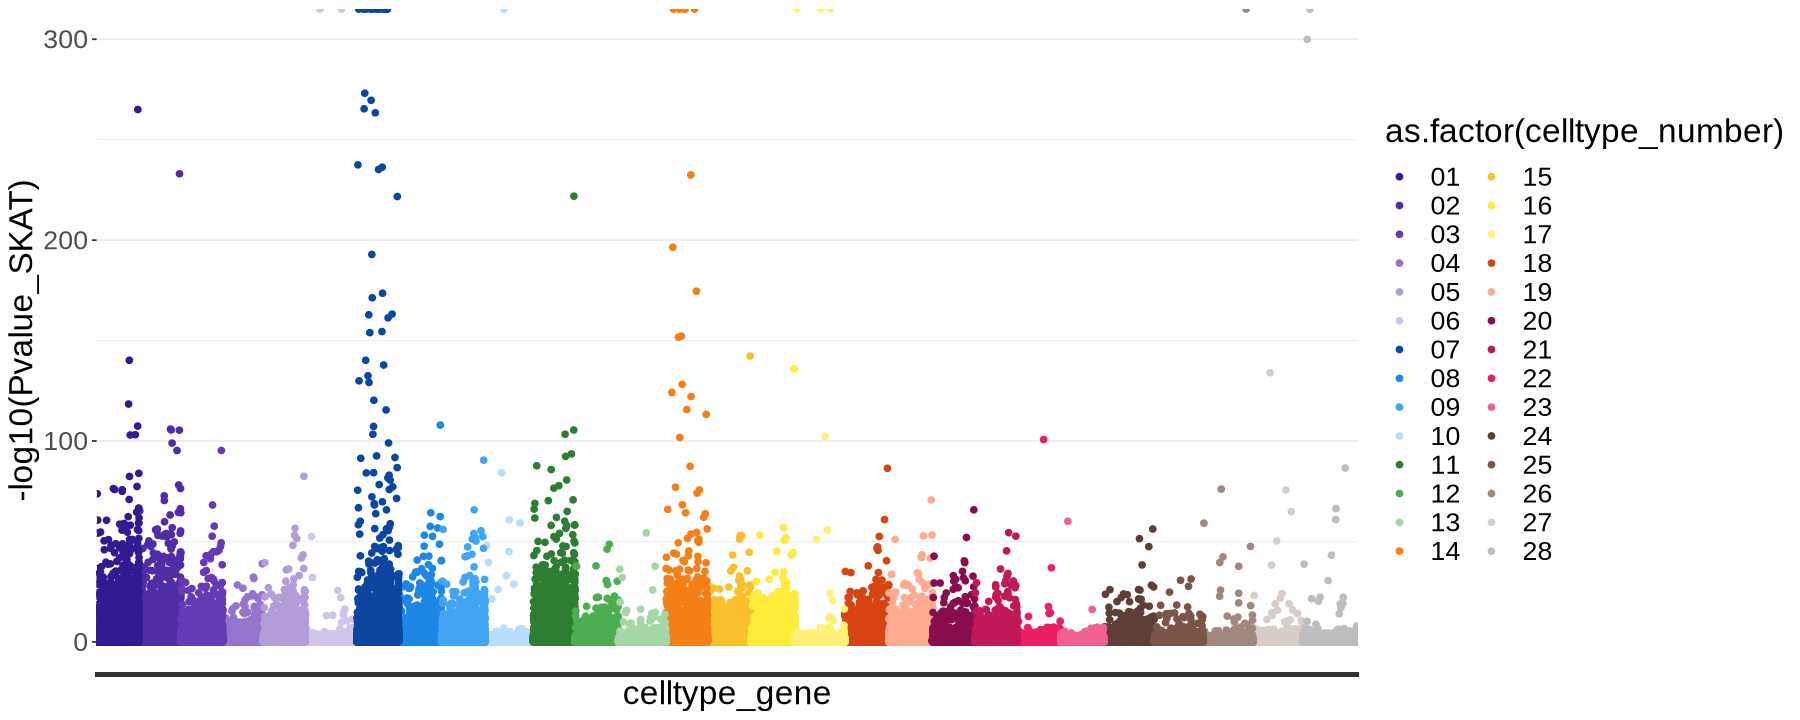

In [67]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(Pvalue_SKAT),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p

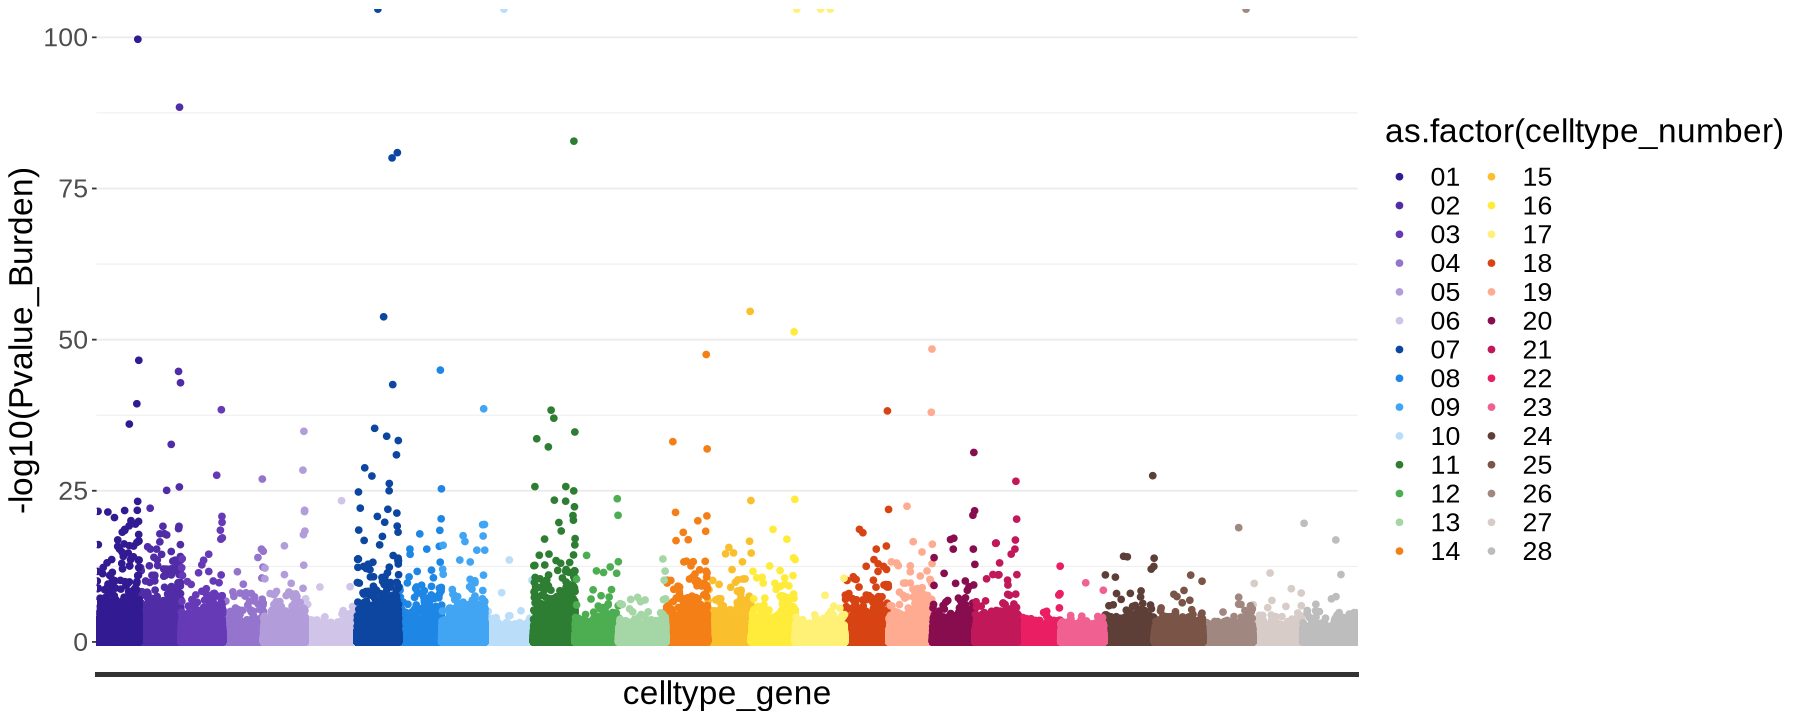

In [68]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(Pvalue_Burden),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p

In [69]:
# add ACAT-O results for Burden + SKAT (no ACAT-V for now since it's not well calibrated)

In [70]:
#Code adpated from the STAR package https://github.com/xihaoli/STAAR/blob/dc4f7e509f4fa2fb8594de48662bbd06a163108c/R/CCT.R wtih a modifitcaiton: when indiviudal p-value = 1, use minimum p-value 
#' An analytical p-value combination method using the Cauchy distribution
#'
#' The \code{CCT} function takes in a numeric vector of p-values, a numeric
#' vector of non-negative weights, and return the aggregated p-value using Cauchy method.
#' @param pvals a numeric vector of p-values, where each of the element is
#' between 0 to 1, to be combined.
#' @param weights a numeric vector of non-negative weights. If \code{NULL}, the
#' equal weights are assumed.
#' @return the aggregated p-value combining p-values from the vector \code{pvals}.
#' @examples pvalues <- c(2e-02,4e-04,0.2,0.1,0.8)
#' @examples CCT(pvals=pvalues)
#' @references Liu, Y., & Xie, J. (2020). Cauchy combination test: a powerful test
#' with analytic p-value calculation under arbitrary dependency structures.
#' \emph{Journal of the American Statistical Association 115}(529), 393-402.
#' (\href{https://www.tandfonline.com/doi/full/10.1080/01621459.2018.1554485}{pub})
#' @export

CCT <- function(pvals, weights=NULL){
  #### check if there is NA
  if(sum(is.na(pvals)) > 0){
    stop("Cannot have NAs in the p-values!")
  }

  #### check if all p-values are between 0 and 1
  if((sum(pvals<0) + sum(pvals>1)) > 0){
    stop("All p-values must be between 0 and 1!")
  }

  #### check if there are p-values that are either exactly 0 or 1.
  is.zero <- (sum(pvals==0)>=1)
  is.one <- (sum(pvals==1)>=1)
  #if(is.zero && is.one){
  #  stop("Cannot have both 0 and 1 p-values!")
  #}
  if(is.zero){
    return(0)
  }
  if(is.one){
    #warning("There are p-values that are exactly 1!")
    return(min(1,(min(pvals))*(length(pvals))))
  }

  #### check the validity of weights (default: equal weights) and standardize them.
  if(is.null(weights)){
    weights <- rep(1/length(pvals),length(pvals))
  }else if(length(weights)!=length(pvals)){
    stop("The length of weights should be the same as that of the p-values!")
  }else if(sum(weights < 0) > 0){
    stop("All the weights must be positive!")
  }else{
    weights <- weights/sum(weights)
  }

  #### check if there are very small non-zero p-values
  is.small <- (pvals < 1e-16)
  if (sum(is.small) == 0){
    cct.stat <- sum(weights*tan((0.5-pvals)*pi))
  }else{
    cct.stat <- sum((weights[is.small]/pvals[is.small])/pi)
    cct.stat <- cct.stat + sum(weights[!is.small]*tan((0.5-pvals[!is.small])*pi))
  }

  #### check if the test statistic is very large.
  if(cct.stat > 1e+15){
    pval <- (1/cct.stat)/pi
  }else{
    pval <- 1-pcauchy(cct.stat)
  }
  return(pval)
}

In [71]:
get_CCT_pvalue = function(pvalue, weights=NULL){
   pvals = pvalue
   notna = which(!is.na(pvals))
   if(length(notna) > 0){
     pvals = pvals[!is.na(pvals)]
     cctpval = CCT(pvals, weights=weights)
   }else{
     cctpval = NA
   }
   return(cctpval)
}

In [72]:
df_new = as.data.frame(df_new)
for (i in 1:nrow(df_new)){
    df_new[i,'Pvalue_noACAT'] = get_CCT_pvalue(c(df_new[i,'Pvalue_Burden'], df_new[i,'Pvalue_SKAT']))
}

In [73]:
head(df_new)

,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare,qvalue,celltype,celltype_number,celltype_gene,Pvalue_noACAT
,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,ENSG00000000457,Cauchy,NA,NA,NA,7.686930e-01,3.037512e-01,NA,0.9191680,0.5721354,NA,NA,NA,NA,NA,6.909129e-01,ASDC,27,27_ENSG00000000457,0.8550301
2,ENSG00000000460,Cauchy,NA,NA,NA,1.086815e-01,3.518001e-02,NA,0.8486423,0.2003384,NA,NA,NA,NA,NA,2.108089e-01,ASDC,27,27_ENSG00000000460,0.5881955
3,ENSG00000000938,Cauchy,NA,NA,NA,1.451239e-02,4.815673e-03,NA,0.4537069,0.6436826,NA,NA,NA,NA,NA,4.572631e-02,ASDC,27,27_ENSG00000000938,0.5533380
4,ENSG00000001460,Cauchy,NA,NA,NA,1.280975e-06,4.269914e-07,NA,0.5002314,0.6872513,NA,NA,NA,NA,NA,1.155112e-05,ASDC,27,27_ENSG00000001460,0.6025753
5,ENSG00000001461,Cauchy,NA,NA,NA,8.116344e-01,6.918542e-01,NA,0.7700342,0.8847768,NA,NA,NA,NA,NA,7.038505e-01,ASDC,27,27_ENSG00000001461,0.8449303
6,ENSG00000004455,Cauchy,NA,NA,NA,8.711246e-01,7.583009e-01,NA,0.8242684,0.9276461,NA,NA,NA,NA,NA,7.192949e-01,ASDC,27,27_ENSG00000004455,0.8967298


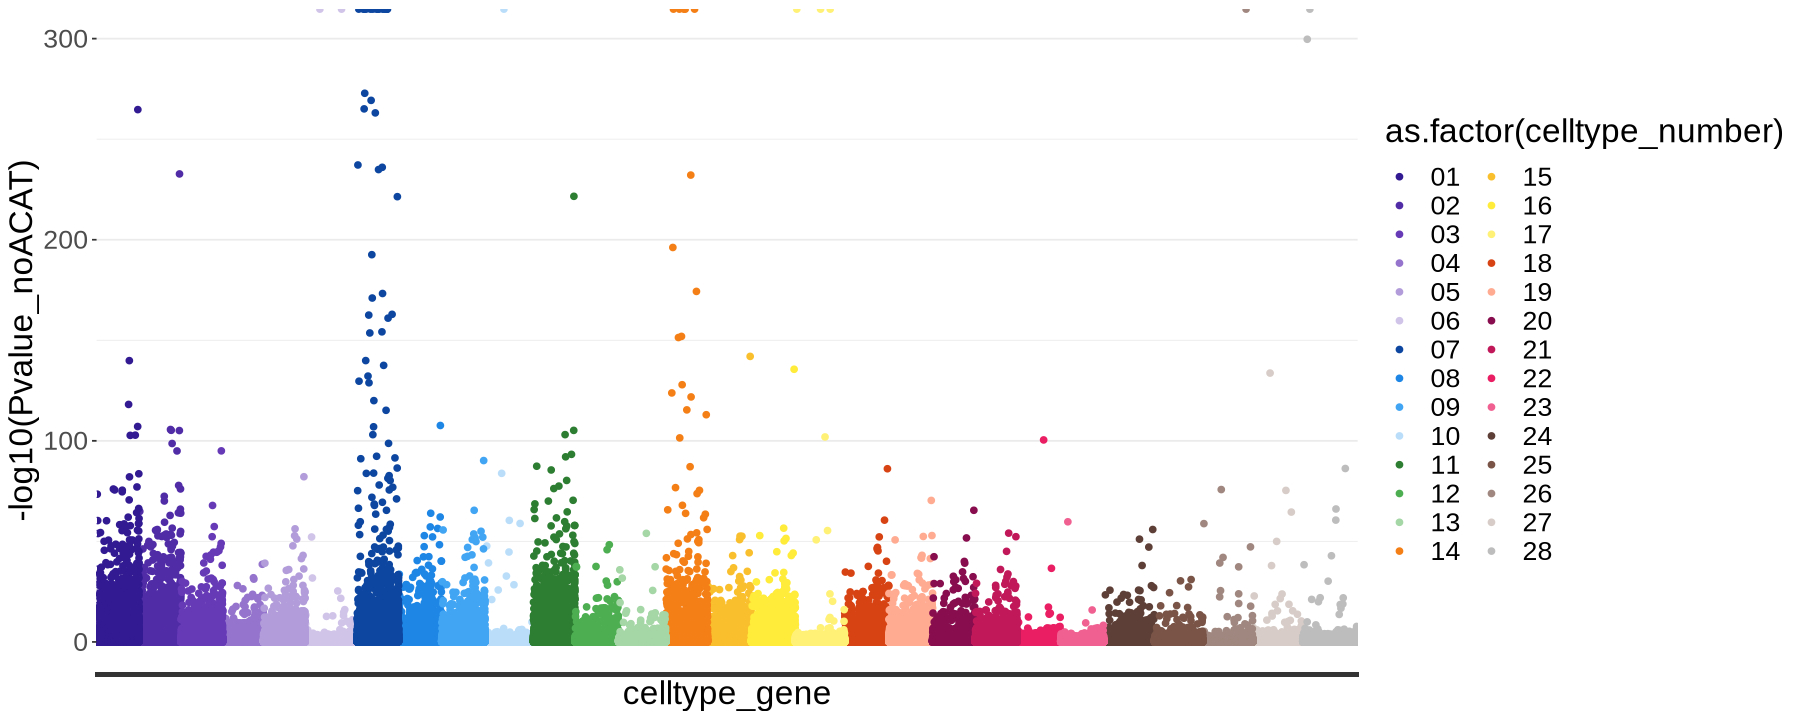

In [74]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p = ggplot(df_new, aes(x=celltype_gene,y=-log10(Pvalue_noACAT),colour=as.factor(celltype_number)))
p = p + geom_point()
p = p + scale_color_manual(values = cols)
p = p + theme_bw() 
p = p +
    theme( 
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      text = element_text(size=20),
      axis.text.x = element_blank(),
    ) 
p